In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
import scipy as sp
from scipy import stats
from scipy.signal.windows import tukey
from scipy import optimize
import scipy.integrate as integrate
import scipy.stats as st
from astropy.io import fits
import seaborn as sns
from oopse2 import *
import os
sns.set(font="MathJax_Main",style='ticks',context='talk')

In [2]:
def sinusoid(t,a,f,phi):
    return a*(np.cos(2*np.pi*f*t + phi)+ 1j*np.sin(2*np.pi*f*t))

In [9]:
for file in os.listdir('../psrj2229_fits/'):
    if file.endswith('fits'):
        print(file)

j2229_20231207_T1.fits
j2229_20231207_T2.fits
j2229_20231207_T3.fits
j2229_20231207_T4.fits
j2229_20231019_T1.fits
j2229_20231019_T2.fits
j2229_20231019_T3.fits
j2229_20231019_T4.fits
j2229_20231020_T1.fits
j2229_20231020_T2.fits
j2229_20231020_T3.fits
j2229_20231020_T4.fits
j2229_20231203_T2.fits
j2229_20231203_T3.fits
j2229_20231203_T4.fits
j2229_20231203_2_T2.fits
j2229_20231203_2_T3.fits
j2229_20231203_2_T4.fits
j2229_20231204_T1.fits
j2229_20231204_T2.fits
j2229_20231204_T3.fits
j2229_20231204_T4.fits
j2229_20231204_2_T1.fits
j2229_20231204_2_T2.fits
j2229_20231204_2_T3.fits
j2229_20231204_2_T4.fits
j2229_20231231_T1.fits
j2229_20231231_T2.fits
j2229_20231231_T3.fits
j2229_20231231_T4.fits
j2229_20240103_T1.fits
j2229_20240103_T2.fits
j2229_20240103_T3.fits
j2229_20240103_T4.fits
j2229_20240911_T1.fits
j2229_20240911_T2.fits
j2229_20240911_T3.fits
j2229_20240913_T1.fits
j2229_20240913_T2.fits
j2229_20240913_T3.fits
j2229_20241004_T1.fits
j2229_20241004_T2.fits
j2229_20241004_T3.fi

In [11]:
date = '20231207'

In [12]:
hdul1 = fits.open(f'../psrj2229_fits/j2229_{date}_T1.fits')
hdul2 = fits.open(f'../psrj2229_fits/j2229_{date}_T2.fits')
hdul3 = fits.open(f'../psrj2229_fits/j2229_{date}_T3.fits')
hdul4 = fits.open(f'../psrj2229_fits/j2229_{date}_T4.fits')

In [13]:
t1,time1 = hdul1[1].data['signal'],hdul1[1].data['time']
t2,time2 = hdul2[1].data['signal'],hdul2[1].data['time']
t3,time3 = hdul3[1].data['signal'],hdul3[1].data['time']
t4,time4 = hdul4[1].data['signal'],hdul4[1].data['time']

In [20]:
samp1 = int(1/(time1[1]-time1[0]))
samp = int(1/(time2[1]-time2[0]))

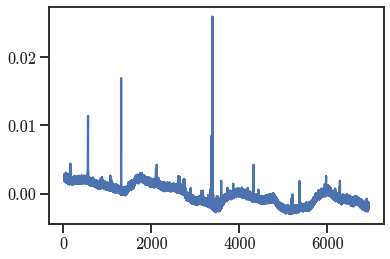

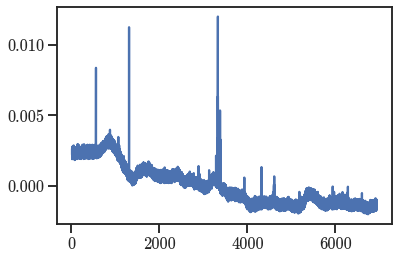

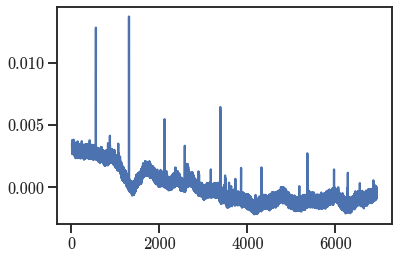

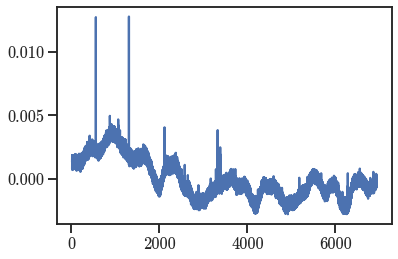

In [15]:
plt.plot(time1,t1)
plt.show()
plt.plot(time2,t2)
plt.show()
plt.plot(time3,t3)
plt.show()
plt.plot(time4,t4)
plt.show()

In [21]:
# undigitize
on1 = t1 + np.random.uniform((-1.22e-5)/2,(1.22e-5)/2,len(t1))
on2 = t2 + np.random.uniform((-1.22e-5)/2,(1.22e-5)/2,len(t2))
on3 = t3 + np.random.uniform((-1.22e-5)/2,(1.22e-5)/2,len(t3))
on4 = t4 + np.random.uniform((-1.22e-5)/2,(1.22e-5)/2,len(t4))

  0%|          | 0/5 [00:00<?, ?it/s]

<Figure size 432x288 with 0 Axes>

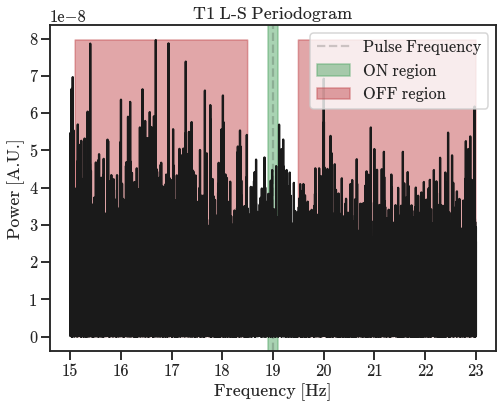

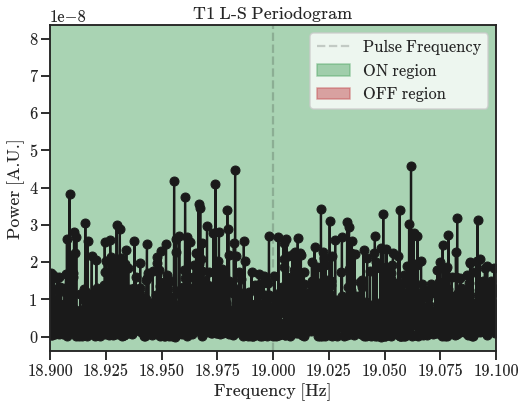

<Figure size 432x288 with 0 Axes>

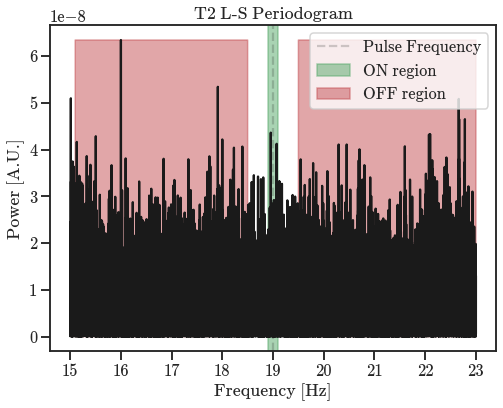

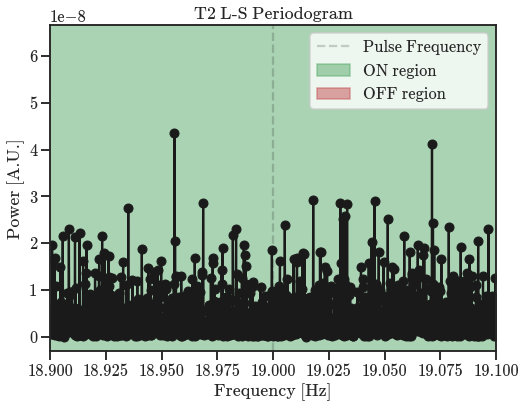

<Figure size 432x288 with 0 Axes>

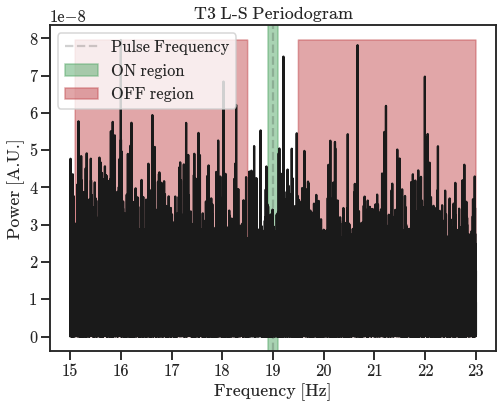

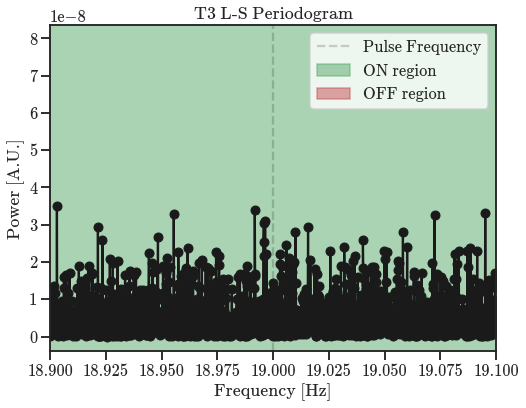

<Figure size 432x288 with 0 Axes>

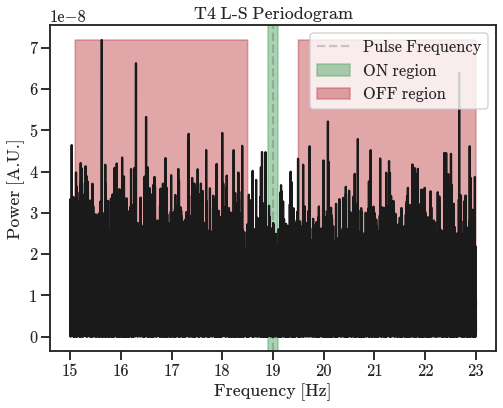

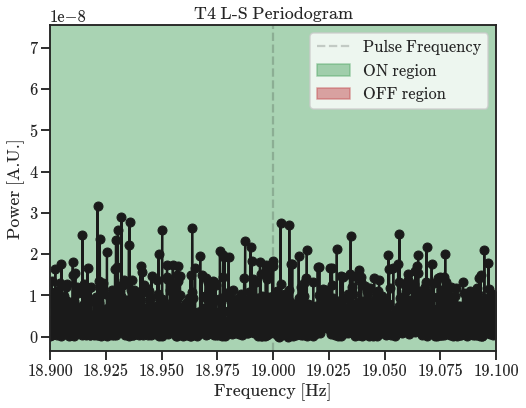

1e-07 -1.3871483576020651 [0.9561630089629752, 0.20701282727011827, 0.9992342941577556, 0.9927459397109202]


<Figure size 432x288 with 0 Axes>

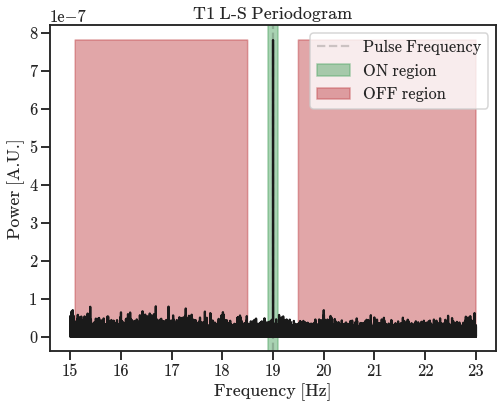

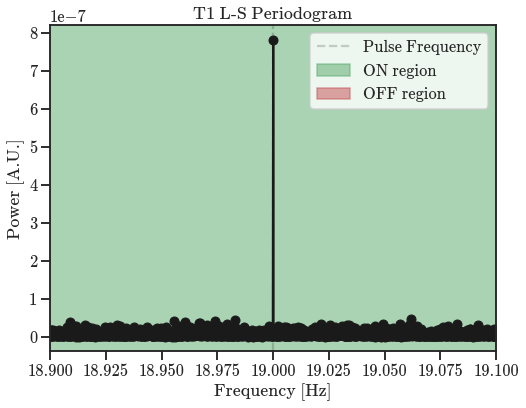

<Figure size 432x288 with 0 Axes>

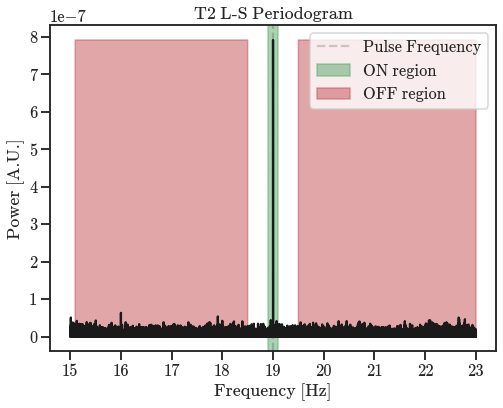

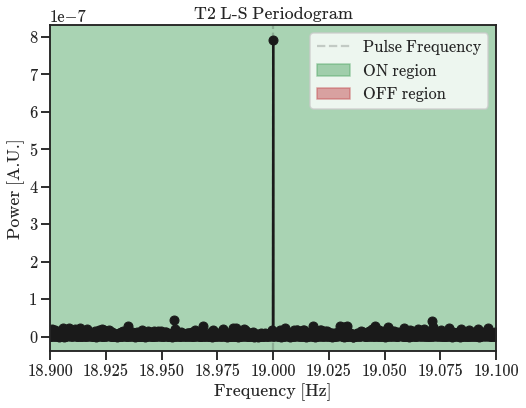

<Figure size 432x288 with 0 Axes>

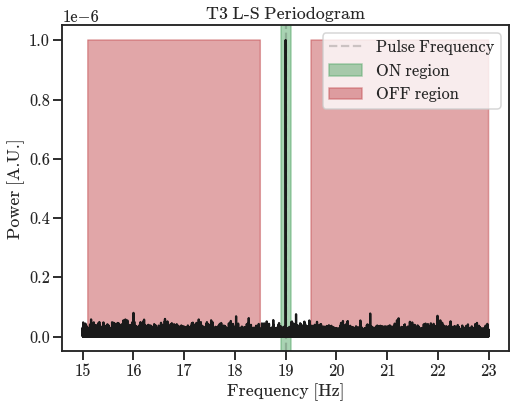

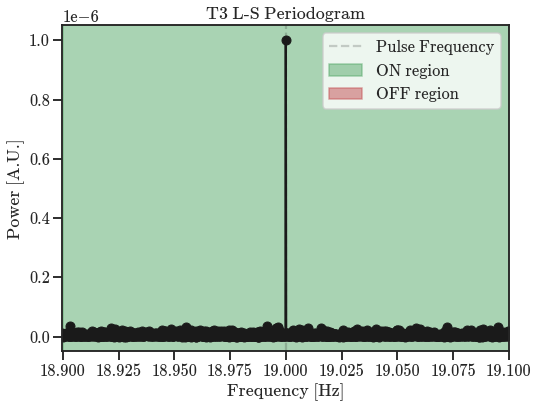

<Figure size 432x288 with 0 Axes>

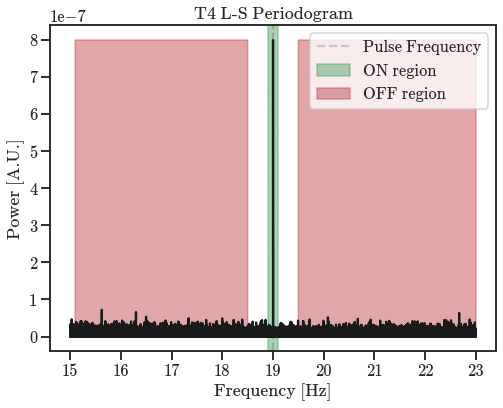

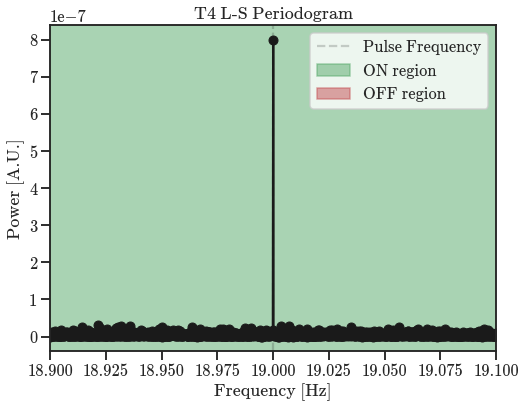

1.8249999999999999e-06 inf [0.0, 0.0, 0.0, 0.0]


<Figure size 432x288 with 0 Axes>

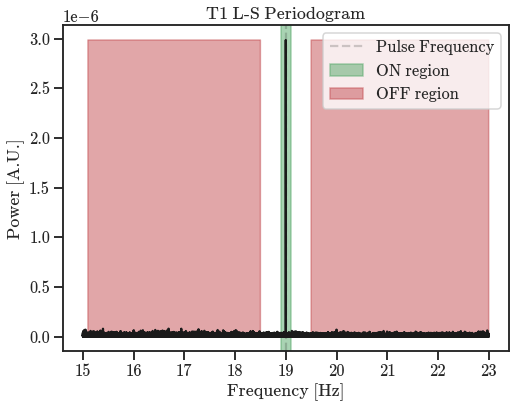

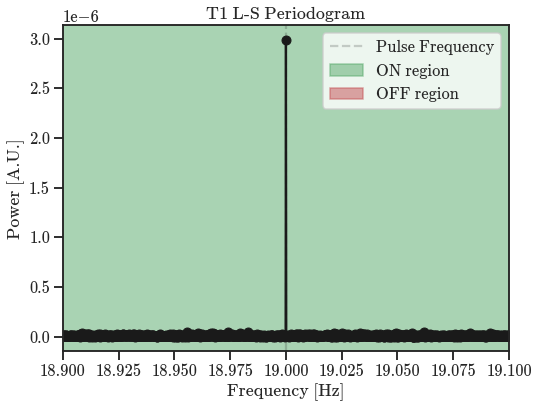

<Figure size 432x288 with 0 Axes>

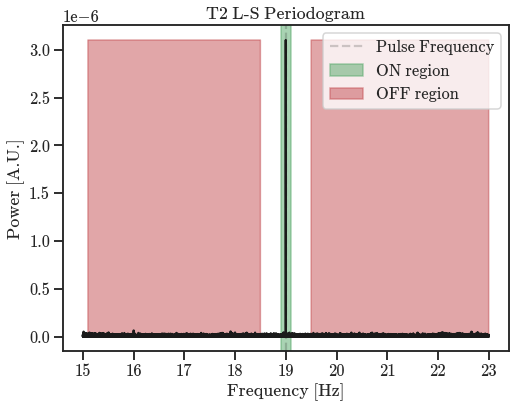

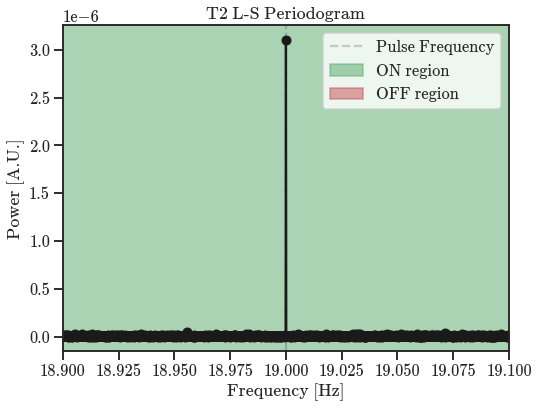

<Figure size 432x288 with 0 Axes>

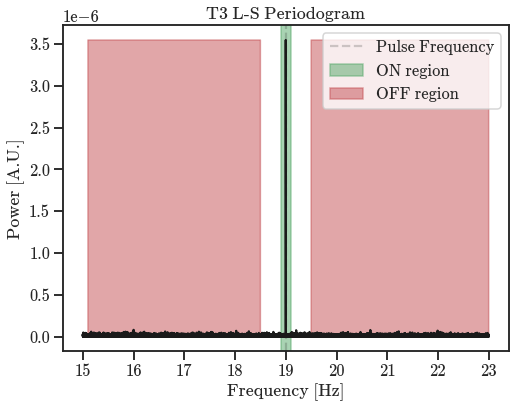

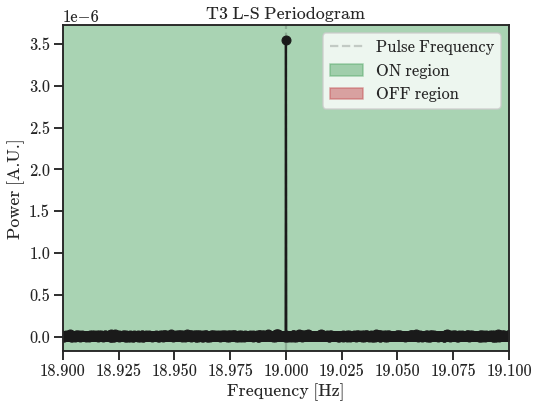

<Figure size 432x288 with 0 Axes>

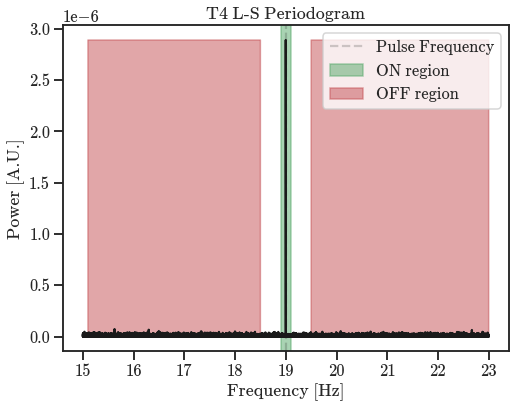

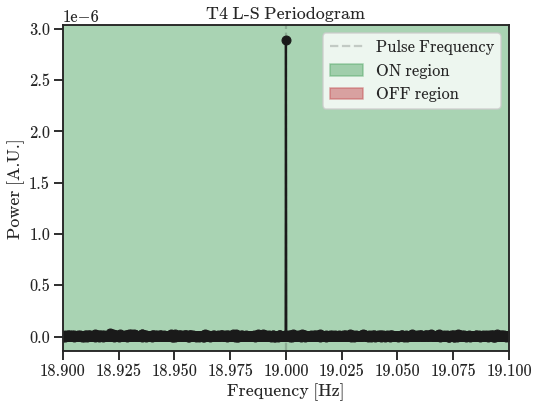

3.55e-06 inf [0.0, 0.0, 0.0, 0.0]


<Figure size 432x288 with 0 Axes>

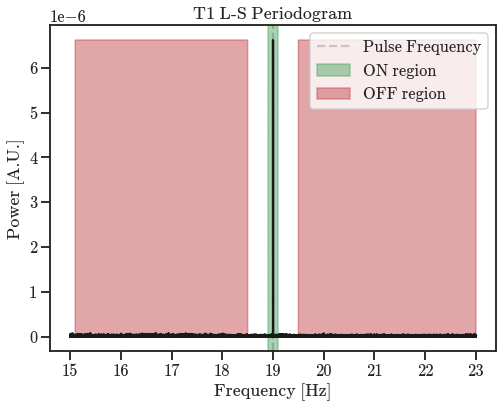

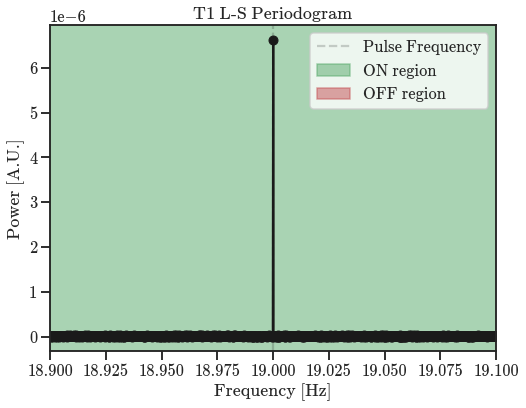

<Figure size 432x288 with 0 Axes>

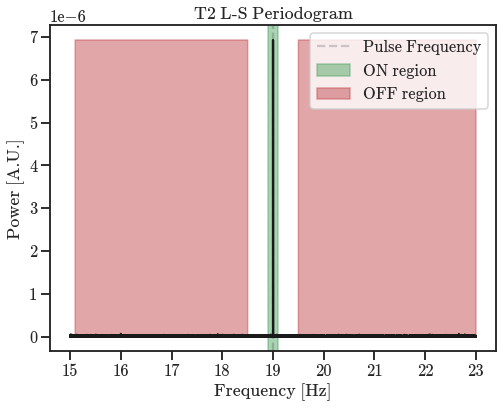

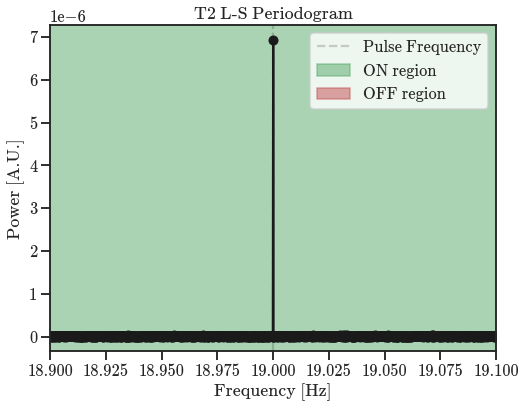

<Figure size 432x288 with 0 Axes>

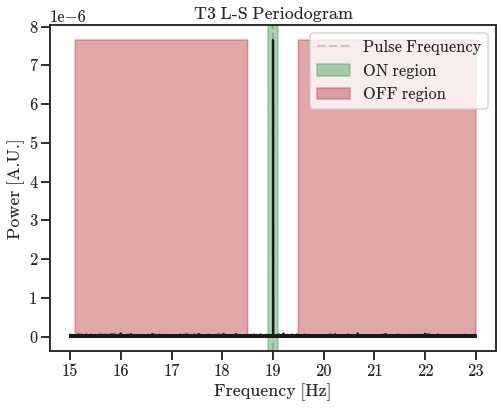

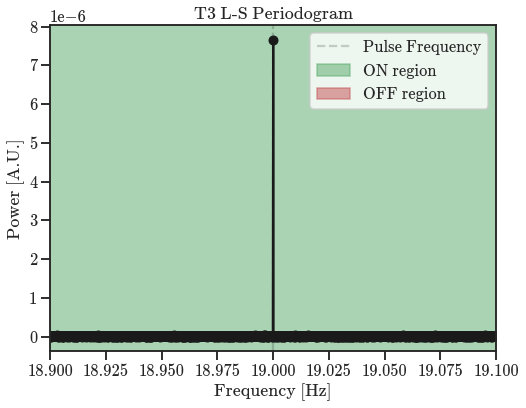

<Figure size 432x288 with 0 Axes>

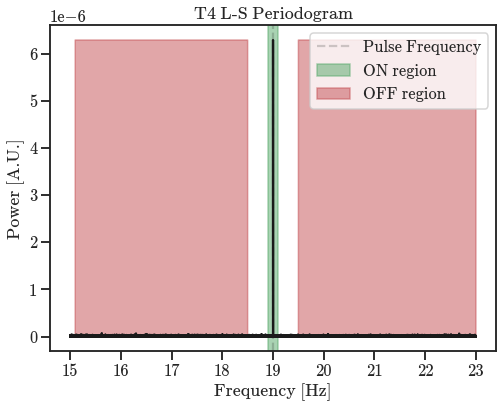

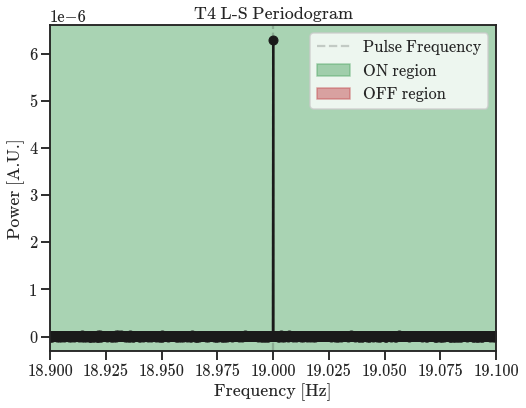

5.275e-06 inf [0.0, 0.0, 0.0, 0.0]


<Figure size 432x288 with 0 Axes>

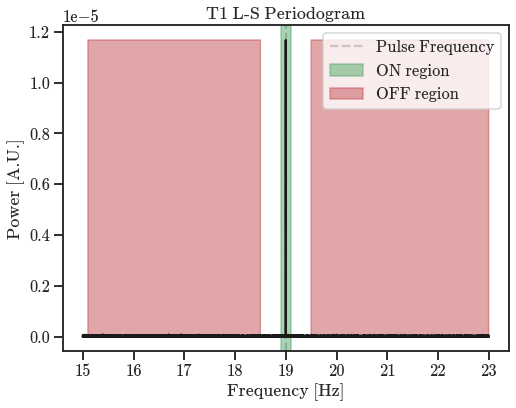

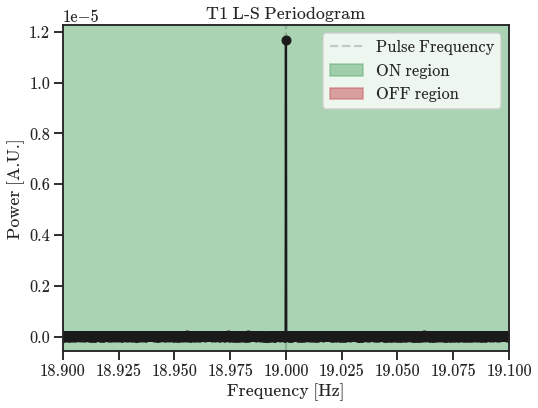

<Figure size 432x288 with 0 Axes>

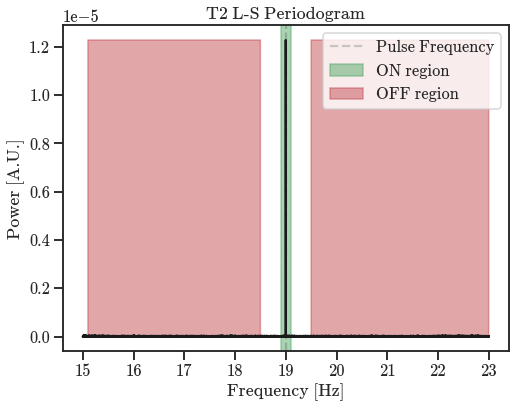

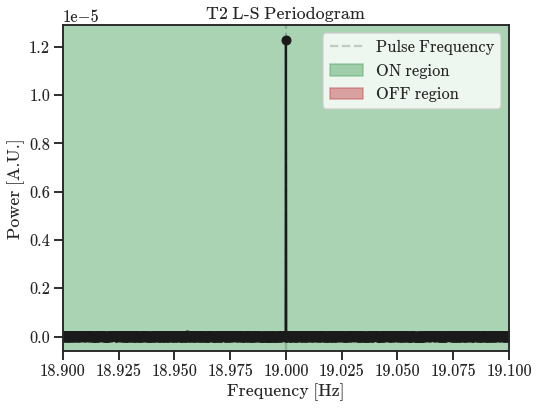

<Figure size 432x288 with 0 Axes>

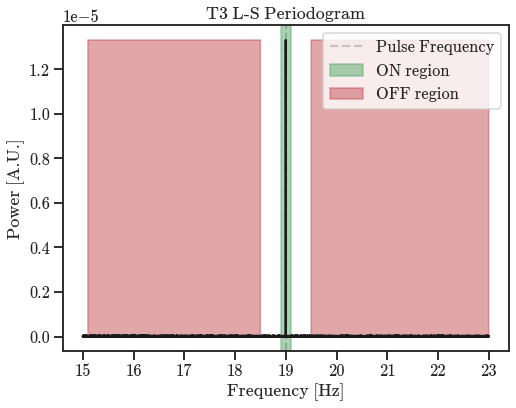

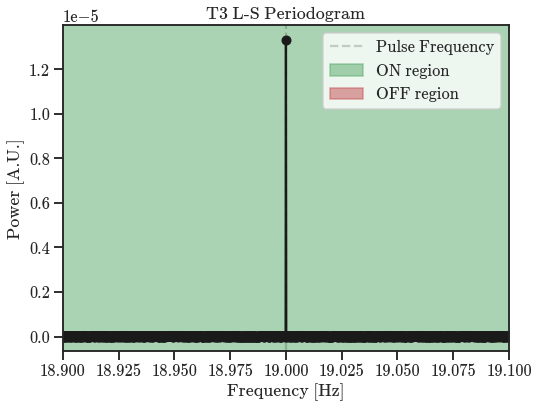

<Figure size 432x288 with 0 Axes>

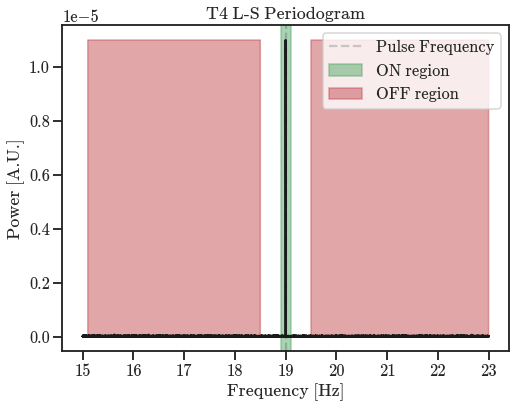

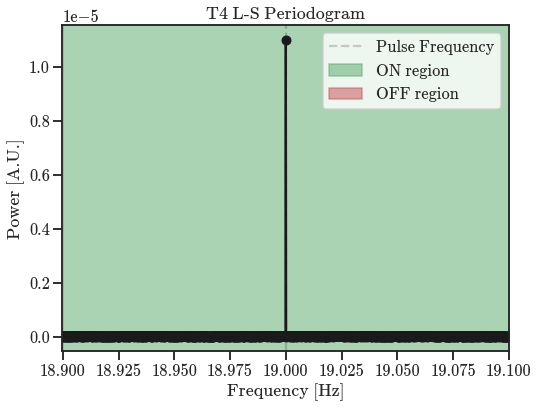

7e-06 inf [0.0, 0.0, 0.0, 0.0]


In [28]:
from tqdm.auto import tqdm

# voltages for the injected sinusoidal signals
amps = np.linspace(1e-7,7e-6,5)

# pulse frequency - doesn't really need to match actual frequency exactly
p = 19

all_pvals = []

for amp in tqdm(amps):
    sin1 = np.real(sinusoid(time2,amp,p,0))
    sin2 = np.real(sinusoid(time2,amp,p,0))
    sin3 = np.real(sinusoid(time3,amp,p,0))
    sin4 = np.real(sinusoid(time4,amp,p,0))
    
    signal1 = on1 + sin1
    signal2 = on2 + sin2
    signal3 = on3 + sin3
    signal4 = on4 + sin4
    
    # re-digitize
    step = 1.22e-5 #G100
    edges = np.arange(-1,1,step)

    dig1 = np.zeros(len(signal1))
    dig2 = np.zeros(len(signal2))
    dig3 = np.zeros(len(signal3))
    dig4 = np.zeros(len(signal4))

    dig_bins1 = np.digitize(signal1,edges,right=True)
    dig_bins2 = np.digitize(signal2,edges,right=True)
    dig_bins3 = np.digitize(signal3,edges,right=True)
    dig_bins4 = np.digitize(signal4,edges,right=True)

    for i,b in enumerate(dig_bins2):
        dig1[i] = edges[dig_bins1[i]-1]
        dig2[i] = edges[dig_bins2[i]-1]
        dig3[i] = edges[dig_bins3[i]-1]
        dig4[i] = edges[dig_bins4[i]-1]
    
    spacing1 = get_spacing(samp,len(dig2))
    spacing2 = get_spacing(samp,len(dig2))
    spacing3 = get_spacing(samp,len(dig3))
    spacing4 = get_spacing(samp,len(dig4))
    
    
    harmonics = 1
    p_array=[]
    
    # on window - get from wiki page
    hz = 1e-1
    
    pts1 = 2*hz/spacing1
    pts2 = 2*hz/spacing2 
    pts3 = 2*hz/spacing3
    pts4 = 2*hz/spacing4

    p1 = calc_p_gumball(time1,dig1,p,1,spacing1,samp=samp1,numpoints=pts1)
    p2 = calc_p_gumball(time2,dig2,p,2,spacing2,samp=samp,numpoints=pts2)
    p3 = calc_p_gumball(time3,dig3,p,3,spacing3,samp=samp,numpoints=pts3)
    p4 = calc_p_gumball(time4,dig4,p,4,spacing4,samp=samp,numpoints=pts4)
    
    p_array.append(p1)
    p_array.append(p2)
    p_array.append(p3)
    p_array.append(p4)
    
    all_pvals.append(p_array)
    
    print(amp,calc_sigma(p_array),p_array)

In [48]:
def get_mag(signal):
    return ((np.log10(np.abs(signal)) - 2.27458167)/-0.40355447)

def get_V(mag):
    return 10**(-0.4*mag+2.27458167)

mag_array = np.linspace(19,23,5)

for m in mag_array:
    print(get_V(m),m)

4.726957199751552e-06 19.0
1.881835556120575e-06 20.0
7.491722286941286e-07 21.0
2.9825083622267684e-07 22.0
1.1873579652382429e-07 23.0
